In [13]:
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd#It contains high-level data structures and manipulation tools designed to make data analysis fast and easy
import matplotlib.pyplot as plt#It is a Plotting Library
import seaborn as sns#Seaborn is a Python data visualization library based on matplotlib.
from sklearn.linear_model import LogisticRegression#Logistic Regression is a Machine Learning classification algorithm
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #splitting of dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [14]:
zomato_orgnl=pd.read_csv("C:/Capstone/zomato_data.csv")
zomato_orgnl.head()

,URL,Address,Name,Online_order,Book_table,Rate,Votes,Phone,Location,Rest_type,Dish_liked,Cuisines,Approx_cost,Reviews_list,Menu_item,Listed_in(type),Listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",?800 for two people (approx.),"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],buffet_restaurants,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",?800 for two people (approx.),"[('Rated 4.0', 'RATED\n Had been here for din...",[],buffet_restaurants,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Café, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",?800 for two people (approx.),"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],buffet_restaurants,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",?300 for two people (approx.),"[('Rated 4.0', ""RATED\n Great food and proper...",[],buffet_restaurants,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",?600 for two people (approx.),"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],buffet_restaurants,Banashankari


Deleting unnecessary column

In [15]:
#Deleting Unnnecessary Columns
zomato=zomato_orgnl.drop(['URL','Dish_liked','Phone'],axis=1) 

Removing the duplicates

In [16]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

Remove the NaN values from the dataset

In [17]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41092 entries, 0 to 51831
Data columns (total 14 columns):
Address            41092 non-null object
Name               41092 non-null object
Online_order       41092 non-null object
Book_table         41092 non-null object
Rate               41092 non-null object
Votes              41092 non-null float64
Location           41092 non-null object
Rest_type          41092 non-null object
Cuisines           41092 non-null object
Approx_cost        41092 non-null object
Reviews_list       41092 non-null object
Menu_item          41092 non-null object
Listed_in(type)    41092 non-null object
Listed_in(city)    41092 non-null object
dtypes: float64(1), object(13)
memory usage: 4.7+ MB


Changing the Columns Names

In [18]:
#Changing the Columns Names
zomato.columns
zomato = zomato.rename(columns={'Approx_cost':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns


Index(['Address', 'Name', 'Online_order', 'Book_table', 'Rate', 'Votes',
       'Location', 'Rest_type', 'Cuisines', 'cost', 'Reviews_list',
       'Menu_item', 'Listed_in(type)', 'Listed_in(city)'],
      dtype='object')

Some Transformations

In [19]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))

zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41092 entries, 0 to 51831
Data columns (total 14 columns):
Address            41092 non-null object
Name               41092 non-null object
Online_order       41092 non-null object
Book_table         41092 non-null object
Rate               41092 non-null object
Votes              41092 non-null float64
Location           41092 non-null object
Rest_type          41092 non-null object
Cuisines           41092 non-null object
cost               41092 non-null object
Reviews_list       41092 non-null object
Menu_item          41092 non-null object
Listed_in(type)    41092 non-null object
Listed_in(city)    41092 non-null object
dtypes: float64(1), object(13)
memory usage: 4.7+ MB


Adjust the column names



In [20]:
# Adjust the column names
zomato.Name = zomato.Name.apply(lambda x:x.title())
zomato.Online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.Book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique()

array(['?800 for two people (approx.) ', '?300 for two people (approx.) ',
       '?600 for two people (approx.) ', '?700 for two people (approx.) ',
       '?550 for two people (approx.) ', '?500 for two people (approx.) ',
       '?450 for two people (approx.) ', '?650 for two people (approx.) ',
       '?400 for two people (approx.) ', '?900 for two people (approx.) ',
       '?200 for two people (approx.) ', '?750 for two people (approx.) ',
       '?150 for two people (approx.) ', '?850 for two people (approx.) ',
       '?100 for two people (approx.) ',
       '?1.200 for two people (approx.)  with alcohol ',
       '?350 for two people (approx.) ', '?250 for two people (approx.) ',
       '?800 for two people (approx.)  with alcohol ',
       '?950 for two people (approx.) ',
       '?1.000 for two people (approx.)  with alcohol ',
       '?1.200 for two people (approx.) ',
       '?1.500 for two people (approx.) ',
       '?1.300 for two people (approx.) ',
       '?1.000 for t

Encode the input Variables



In [22]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['Rate', 'cost', 'Votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

Get Correlation between different variables



Index(['Address', 'Name', 'Online_order', 'Book_table', 'Rate', 'Votes',
       'Location', 'Rest_type', 'Cuisines', 'cost', 'Reviews_list',
       'Menu_item', 'Listed_in(type)', 'Listed_in(city)'],
      dtype='object')

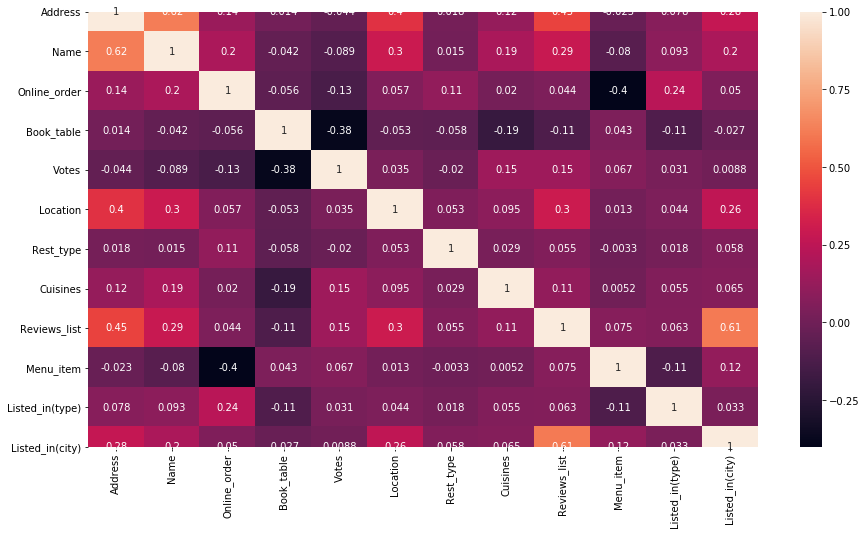

In [28]:
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns

Defining the independent variables and dependent variables

In [23]:
#Defining the independent variables and dependent variables
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['Rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

11553     4.3/5
45702    4.1 /5
13413     4.0/5
37469    3.2 /5
20361     4.1/5
Name: Rate, dtype: object

# Regression Analysis

Linear Regression¶


In [24]:
#Prepare a Linear REgression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

ValueError: could not convert string to float: '?3.000 for two people (approx.) '

In [25]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

ValueError: could not convert string to float: 'â\x82¹500 for two people (approx.) '